# Data Importation and plotting

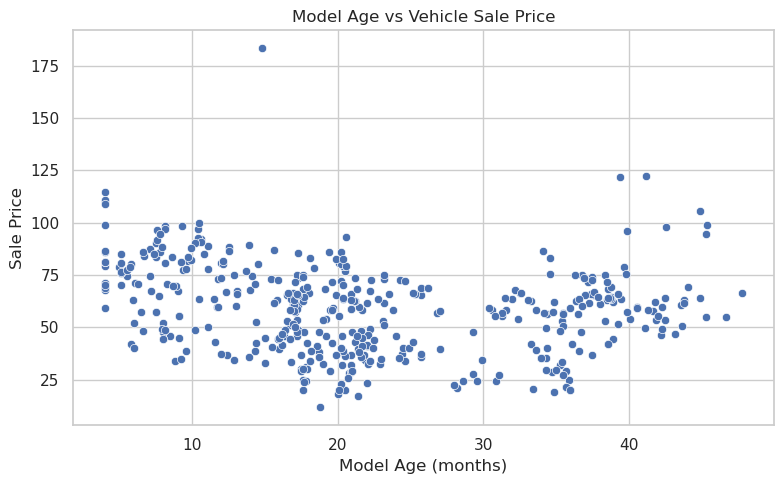

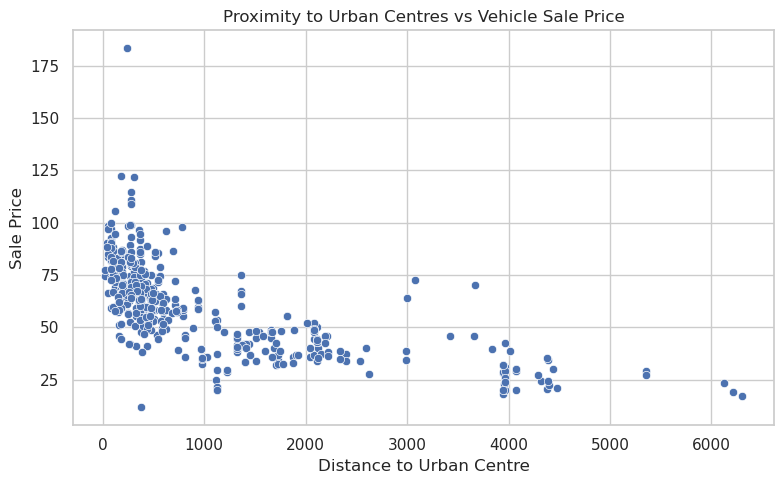

/tmp/ipykernel_8764/4200620231.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='number of dealerships nearby', y='vechicle sale price', data=df, estimator='mean', ci=None)


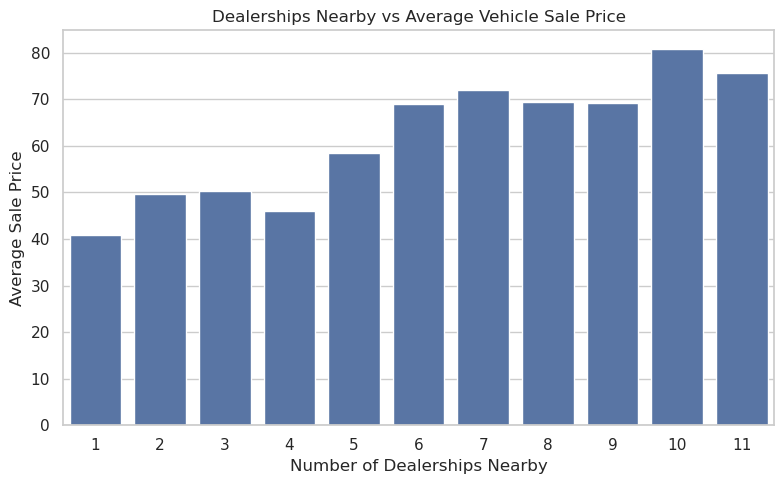

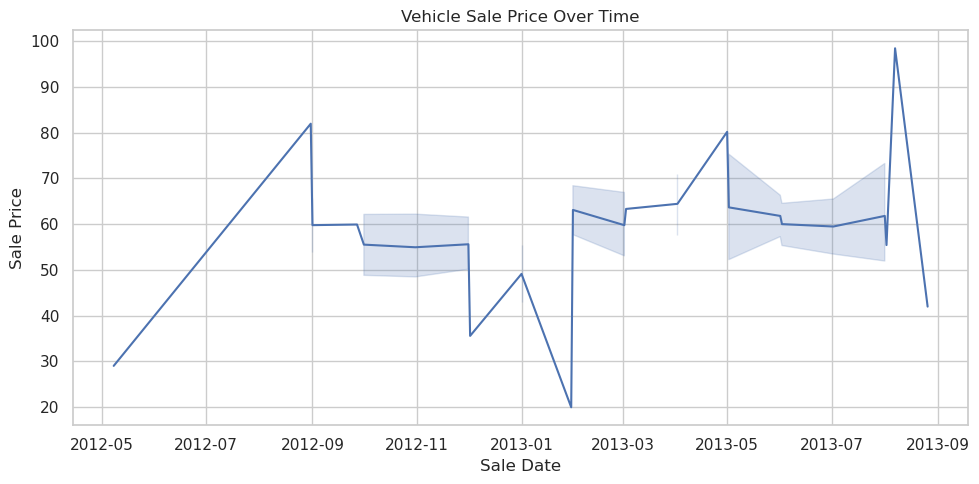

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Load and clean the data

file_path = '/home/dragon/DATA/Data_CW2.xlsx'
df = pd.read_excel(file_path)

# Convert decimal year to datetime
def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    start = datetime(year, 1, 1)
    end = datetime(year + 1, 1, 1)
    days_in_year = (end - start).days
    fraction = decimal_year - year
    return start + timedelta(days=int(fraction * days_in_year))

df['sale date'] = df['sale date'].apply(decimal_year_to_date)

# Drop missing values
df.dropna(inplace=True)

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Scatter plot: Model age vs Vehicle sale price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Model age', y='vechicle sale price', data=df)
plt.title('Model Age vs Vehicle Sale Price')
plt.xlabel('Model Age (months)')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

# 2. Scatter plot: Proximity to urban centres vs Vehicle sale price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='proximity to urban centres', y='vechicle sale price', data=df)
plt.title('Proximity to Urban Centres vs Vehicle Sale Price')
plt.xlabel('Distance to Urban Centre')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

# 3. Bar plot: Number of dealerships nearby vs average vehicle sale price
plt.figure(figsize=(8, 5))
sns.barplot(x='number of dealerships nearby', y='vechicle sale price', data=df, estimator='mean', ci=None)
plt.title('Dealerships Nearby vs Average Vehicle Sale Price')
plt.xlabel('Number of Dealerships Nearby')
plt.ylabel('Average Sale Price')
plt.tight_layout()
plt.show()

# 4. Line plot: Sale date vs Vehicle sale price
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('sale date')
sns.lineplot(x='sale date', y='vechicle sale price', data=df_sorted)
plt.title('Vehicle Sale Price Over Time')
plt.xlabel('Sale Date')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()



## Question 1.1 

### (a) Build a linear regression model to predict vehicle value. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Encode 'sale date' as numeric (e.g., days since start)
df['sale_date_numeric'] = (df['sale date'] - pd.Timestamp("2000-01-01")).dt.days


# Select features and target
features = ['Model age', 'proximity to urban centres', 'number of dealerships nearby', 'sale_date_numeric']
target = 'vechicle sale price'  # Keep the original spelling as in your data

X = df[features]
y = df[target]

# Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 - (mape * 100)

# Output
print("Linear Regression Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"\nIntercept: {model.intercept_:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"Estimated Accuracy: {accuracy:.2f}%")

Linear Regression Coefficients:
  Model age: -0.4077
  proximity to urban centres: -0.0086
  number of dealerships nearby: 1.9605
  sale_date_numeric: 0.0248

Intercept: -51.9709
R² Score: 0.6043
Mean Squared Error: 134.0050
Mean Absolute Percentage Error (MAPE): 17.24%
Estimated Accuracy: 82.76%



### (b) Interpret your regression results for your customer. (14 marks)

---

### Model Summary

* Model age: As vehicles get older, their price decreases by about 0.41 units for each additional month.
* Proximity to urban centres: The farther the vehicle is from a city, the lower the price, but the effect is small.
* Number of dealerships nearby: More nearby dealerships increase the vehicle price by about 1.96 units per dealership.
* Sale date: Vehicles sold more recently tend to have higher prices over time.

---

### Model Performance

* R-squared score is 0.6043, meaning the model explains about sixty percent of the variation in vehicle prices.
* Mean Absolute Percentage Error is seventeen point two four percent, meaning the predictions are off by that amount on average.
* Estimated accuracy is about eighty-two point seven six percent.
* Mean Squared Error is one hundred thirty-four, which is the average squared difference between predicted and actual prices.

---

### Conclusion

The model gives a reasonably good prediction of vehicle price. Adding more features could improve its accuracy.


## **1.2 (a) Concepts**

* **Heteroskedasticity**: This is when the variance of the residuals changes across the range of predicted values. It violates linear regression assumptions and can lead to unreliable standard errors.

* **Multicollinearity**: This happens when independent variables are strongly correlated with each other, which can make the model coefficients unstable and less interpretable.

---

## **1.2 (b) Evidence from Results**

### ✅ **Heteroskedasticity**

* The **residuals vs. predicted plot** shows a fairly **even spread** of residuals around the zero line.
* There's **no clear funnel shape or pattern**, suggesting **constant variance**.
* **Conclusion**: The model does **not suffer from heteroskedasticity**.

### ⚠️ **Multicollinearity**

* You calculated **Variance Inflation Factor (VIF)**:

  * `Model age`: 4.69 ✅ (acceptable)
  * `Proximity to urban centres`: 2.75 ✅ (low)
  * `Number of dealerships nearby`: 6.36 ⚠️ (moderate concern)
  * `Sale date`: 12.63 ❌ (high multicollinearity)

* **Conclusion**: There **is some multicollinearity**, especially due to the **sale date** variable. This could affect the reliability of coefficient estimates.

---

## **1.2 (c) Methods to Address Issues**

### 👉 For Heteroskedasticity:

* Use **robust standard errors** (e.g., White’s correction).
* Apply **log transformation** to the target variable.
* Consider **Weighted Least Squares (WLS)**.

### 👉 For Multicollinearity:

* Remove or combine correlated variables (e.g., drop `sale_date` if not essential).
* Use **Principal Component Analysis (PCA)** to reduce dimensionality.
* Apply **Ridge or Lasso Regression** to shrink coefficients and reduce instability.

---

### ✅ Summary

* The model **does not show heteroskedasticity**, as evidenced by the residual plot.
* However, **multicollinearity is present**, mainly due to the sale date variable.
* Appropriate statistical techniques can address both issues if needed.



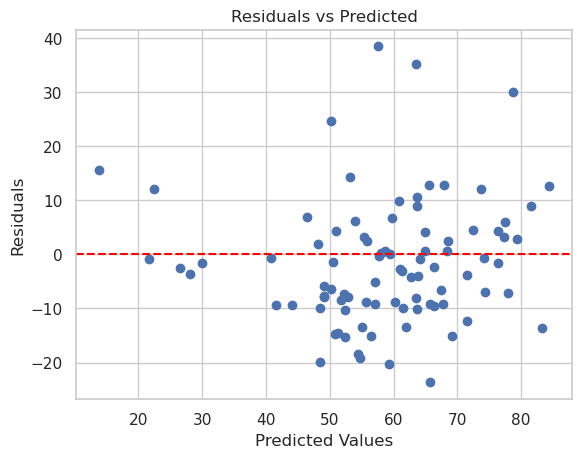

In [10]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Assuming X is your DataFrame of independent variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                        feature        VIF
0                     Model age   4.689997
1    proximity to urban centres   2.752366
2  number of dealerships nearby   6.363272
3             sale_date_numeric  12.636923


# Question 1.3 
One of your colleagues suggests using a nonlinear model instead of a
linear model. Please analyse the data and evaluate whether a nonlinear model is a
better choice. (5 marks)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# --- Train Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Metrics Function ---
def print_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    accuracy = 100 - (mape * 100)
    
    print(f"\n{model_name} Performance:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
    print(f"  Estimated Accuracy: {accuracy:.2f}%")

# --- Show Both Results ---
print("✅ Linear Regression Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

print_metrics(y_test, y_pred, "Linear Regression")
print_metrics(y_test, y_pred_rf, "Random Forest (Nonlinear)")


✅ Linear Regression Coefficients:
  Model age: -0.4077
  proximity to urban centres: -0.0086
  number of dealerships nearby: 1.9605
  sale_date_numeric: 0.0248
Intercept: -51.9709

Linear Regression Performance:
  R² Score: 0.6043
  Mean Squared Error: 134.0050
  Mean Absolute Percentage Error (MAPE): 17.24%
  Estimated Accuracy: 82.76%

Random Forest (Nonlinear) Performance:
  R² Score: 0.7310
  Mean Squared Error: 91.0738
  Mean Absolute Percentage Error (MAPE): 12.02%
  Estimated Accuracy: 87.98%


# Question  2

You are building an algorithm to determine varieties of iris (versicolor or virginica). You
have collected data for a sample of iris. The data include sepal length, sepal width,
petal length, petal width, and the variety of the flower. The data are available in the
Excel file attached.

# Data importation

In [15]:
import pandas as pd
file_path = '/home/dragon/DATA/Data_CW2.xlsx'
# Load the sheet named 'Iris'
df_raw = pd.read_excel('/home/dragon/DATA/Data_CW2.xlsx', sheet_name='Iris', header=None)

# Split the single column by commas into separate columns
df_split = df_raw[0].str.split(',', expand=True)

# Assign appropriate column names
df_split.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

# Convert numeric columns to floats
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df_split[col] = pd.to_numeric(df_split[col], errors='coerce')

# View the cleaned DataFrame
print(df_split.head())


   sepal_length  sepal_width  petal_length  petal_width          variety
0           5.0          2.3           3.4          0.9  Iris-versicolor
1           5.0          2.4           4.6          1.6   Iris-virginica
2           5.1          1.9           3.6          0.9  Iris-versicolor
3           5.1          2.2           3.4          0.9  Iris-versicolor
4           5.2          2.4           3.1          1.0  Iris-versicolor


# Question 2.1 

Use a Kth-Nearest Neighbour model and the Euclidean distance
algorithm to determine the variety of the following observation (6.6, 3.2, 5.1, 1.5). Use
relevant theories of the model to justify your choice. (10 marks)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare the features and labels
X = df_split[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_split['variety']

# Encode the variety labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y_encoded)

# New observation
new_observation = [[6.6, 3.2, 5.1, 1.5]]

# Predict the variety
prediction_encoded = knn.predict(new_observation)
prediction_label = le.inverse_transform(prediction_encoded)

print("Predicted variety:", prediction_label[0])


Predicted variety: Iris-versicolor


/home/dragon/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Question 2.2
 When we use the K-NN model to classify an unseen instance, 
 
 ## a) what might be the problem if we set the value of K to an even number? Please provide the evidence combining the results from 
 
#  Question 2.1.

## b) What could be a possible solution? (6 marks) Question 2.3 Apply 5-NN, 7-NN, and 9-NN models, 

## a) show the confusion matrix, and

## b) calculate the accuracy of these models.

##  c) Which model do you think is the best? Please explain your choice. (16 marks)

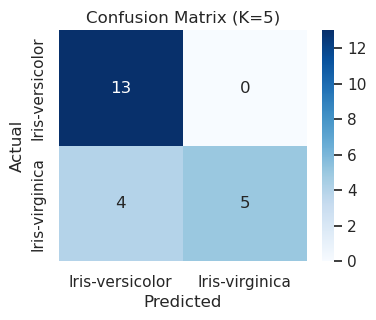

Accuracy for K=5: 0.82


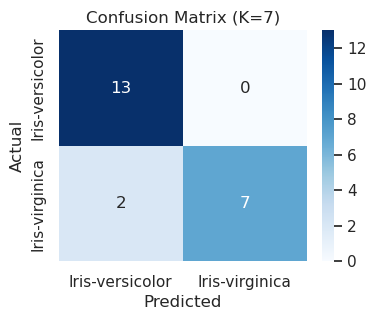

Accuracy for K=7: 0.91


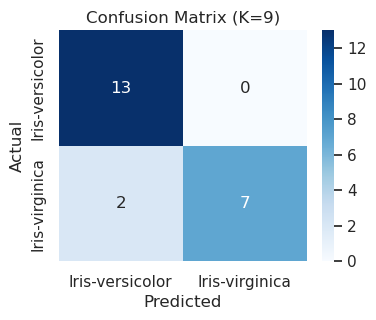

Accuracy for K=9: 0.91


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
X = df_split[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_split['variety']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Function to train, evaluate, and plot confusion matrix
def evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix (K={k})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"Accuracy for K={k}: {acc:.2f}")
    return acc

# Evaluate models
acc_5 = evaluate_knn(5)
acc_7 = evaluate_knn(7)
acc_9 = evaluate_knn(9)
